In [ ]:
import pandas as pd
wine = pd.read_csv('wine_stem.csv')

In [ ]:
wine.isnull().sum()

In [ ]:
modified_wine = wine.fillna(" ")

In [ ]:
modified_wine.isnull().sum()

In [ ]:
modified_wine.to_csv('modified_wine.csv',index=False)

In [11]:
df = pd.DataFrame(modified_wine)

In [14]:
df.drop(df.columns[0], axis=1)

,countri,descript,design,point,price,provinc,region1,region2,varieti,wineri
0,us,tremend 100 variet wine hail oakvill age three...,martha vineyard,96,235,california,napa valley,napa,cabernet sauvignon,heitz
1,spain,ripe aroma fig blackberri cassi soften sweeten...,carodorum seleccin especi reserva,96,110,northern spain,toro,,tinta de toro,bodega carmen rodrguez
2,us,mac watson honor memori wine made mother treme...,special select late harvest,96,90,california,knight valley,sonoma,sauvignon blanc,macauley
3,us,spent 20 month 30 new french oak incorpor frui...,reserv,96,65,oregon,willamett valley,willamett valley,pinot noir,ponzi
4,franc,top wine la bgude name highest point vineyard ...,la brlade,95,66,provenc,bandol,,provenc red blend,domain de la bgude
5,spain,deep dens pure open bell toro winner aroma dar...,numanthia,95,73,northern spain,toro,,tinta de toro,numanthia
6,spain,slight gritti blackfruit aroma includ sweet no...,san romn,95,65,northern spain,toro,,tinta de toro,maurodo
7,spain,lush cedari blackfruit aroma lux offer note ma...,carodorum nico crianza,95,110,northern spain,toro,,tinta de toro,bodega carmen rodrguez
8,us,renam vineyard former bottl delancellotti youl...,silic,95,65,oregon,chehalem mountain,willamett valley,pinot noir,bergstrm
9,us,produc sourc two block vineyard wineon high el...,gap crown vineyard,95,60,california,sonoma coast,sonoma,pinot noir,blue farm


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [20]:
wine = pd.read_csv('wine_stem.csv')
wine.drop(['Unnamed: 0', 'region2'], axis = 1, inplace = True)

In [21]:
print('Shape: ', wine.shape)
print('=========================================================================')
print(wine.head())

('Shape: ', (150930, 9))
  countri                                           descript  \
0      us  tremend 100 variet wine hail oakvill age three...   
1   spain  ripe aroma fig blackberri cassi soften sweeten...   
2      us  mac watson honor memori wine made mother treme...   
3      us  spent 20 month 30 new french oak incorpor frui...   
4   franc  top wine la bgude name highest point vineyard ...   

                              design  point  price         provinc  \
0                    martha vineyard     96  235.0      california   
1  carodorum seleccin especi reserva     96  110.0  northern spain   
2        special select late harvest     96   90.0      california   
3                             reserv     96   65.0          oregon   
4                          la brlade     95   66.0         provenc   

            region1             varieti                  wineri  
0       napa valley  cabernet sauvignon                   heitz  
1              toro       tinta de to

In [22]:
data = []
for col in wine.columns:
    data.append([col, wine[col].isnull().sum(), '{:.5f}%'.format((float(wine[col].isnull().sum()))/len(wine[col])*100) ])
df = pd.DataFrame(data, columns=['columns', 'missing value count', 'missing value percentage'])
df

,columns,missing value count,missing value percentage
0,countri,5,0.00331%
1,descript,0,0.00000%
2,design,45837,30.36971%
3,point,0,0.00000%
4,price,13695,9.07374%
5,provinc,1175,0.77851%
6,region1,25060,16.60372%
7,varieti,0,0.00000%
8,wineri,29,0.01921%


In [23]:
duplicated_records = wine[wine.duplicated(['countri', 'descript', 'design', 'point', 'price', 'provinc', 'region1', 'varieti', 'wineri'])]
duplicated_records.shape

(53079, 9)

In [24]:
# drop all duplicates and check how many left
new_wine = wine.drop_duplicates()
new_wine.shape

(97851, 9)

In [25]:
# check again for missing values
data = []
for col in new_wine.columns:
    data.append([col, new_wine[col].isnull().sum(), '{:.5f}%'.format(float((new_wine[col].isnull().sum()))/len(new_wine[col])*100) ])
df = pd.DataFrame(data, columns=['columns', 'missing value count', 'missing value percentage'])
df

,columns,missing value count,missing value percentage
0,countri,3,0.00307%
1,descript,0,0.00000%
2,design,29958,30.61594%
3,point,0,0.00000%
4,price,8720,8.91151%
5,provinc,695,0.71026%
6,region1,15932,16.28190%
7,varieti,0,0.00000%
8,wineri,19,0.01942%


In [26]:
# I will remove only the three rows in the dataset that have missing values in the country and province column
new_wine = new_wine.dropna(subset=['price','countri', 'provinc'])
new_wine.shape

(88483, 9)

In [27]:
new_wine

,countri,descript,design,point,price,provinc,region1,varieti,wineri
0,us,tremend 100 variet wine hail oakvill age three...,martha vineyard,96,235.0,california,napa valley,cabernet sauvignon,heitz
1,spain,ripe aroma fig blackberri cassi soften sweeten...,carodorum seleccin especi reserva,96,110.0,northern spain,toro,tinta de toro,bodega carmen rodrguez
2,us,mac watson honor memori wine made mother treme...,special select late harvest,96,90.0,california,knight valley,sauvignon blanc,macauley
3,us,spent 20 month 30 new french oak incorpor frui...,reserv,96,65.0,oregon,willamett valley,pinot noir,ponzi
4,franc,top wine la bgude name highest point vineyard ...,la brlade,95,66.0,provenc,bandol,provenc red blend,domain de la bgude
5,spain,deep dens pure open bell toro winner aroma dar...,numanthia,95,73.0,northern spain,toro,tinta de toro,numanthia
6,spain,slight gritti blackfruit aroma includ sweet no...,san romn,95,65.0,northern spain,toro,tinta de toro,maurodo
7,spain,lush cedari blackfruit aroma lux offer note ma...,carodorum nico crianza,95,110.0,northern spain,toro,tinta de toro,bodega carmen rodrguez
8,us,renam vineyard former bottl delancellotti youl...,silic,95,65.0,oregon,chehalem mountain,pinot noir,bergstrm
9,us,produc sourc two block vineyard wineon high el...,gap crown vineyard,95,60.0,california,sonoma coast,pinot noir,blue farm


In [28]:
# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import KFold
# from sklearn.model_selection import train_test_split

# wine_df=new_wine.loc[new_wine.countri=='us',['provinc','design','point','price','region1','varieti','wineri']]

# wine_train = wine_df

# design_lab=LabelEncoder().fit(np.unique(new_wine.design.values))
# prov_lab=LabelEncoder().fit(np.unique(new_wine.provinc.values))
# regn_lab=LabelEncoder().fit(np.unique(new_wine.region1.values))
# var_lab=LabelEncoder().fit(np.unique(new_wine.varieti.values))
# wnry_lab=LabelEncoder().fit(np.unique(new_wine.wineri.values))
# points_lab=LabelEncoder().fit(np.unique(new_wine.point.values))
# wine_train['prov_enc']=prov_lab.transform(wine_train.provinc)
# wine_train['design_enc']=design_lab.transform(wine_train.design)
# wine_train['regn_enc']=regn_lab.transform(wine_train.region1)
# wine_train['var_enc']=var_lab.transform(wine_train.varieti)
# wine_train['wnry_enc']=wnry_lab.transform(wine_train.wineri)
# wine_train['points_enc']=points_lab.transform(wine_train.point)
# wine_train=wine_train.drop(['provinc','design','point','region1','varieti','wineri'],axis=1)


In [29]:
wine_train

NameError: name 'wine_train' is not defined

In [33]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

wine_df=new_wine.loc[new_wine.countri=='us',['provinc','design','point','price','region1','varieti','wineri']]

wine_train = wine_df

design_lab=LabelEncoder().fit(np.unique(new_wine.design.values))
prov_lab=LabelEncoder().fit(np.unique(new_wine.provinc.values))
regn_lab=LabelEncoder().fit(np.unique(new_wine.region1.values))
var_lab=LabelEncoder().fit(np.unique(new_wine.varieti.values))
wnry_lab=LabelEncoder().fit(np.unique(new_wine.wineri.values))
points_lab=LabelEncoder().fit(np.unique(new_wine.point.values))
wine_train['prov_enc']=prov_lab.transform(wine_train.provinc)
wine_train['design_enc']=design_lab.transform(wine_train.design)
wine_train['regn_enc']=regn_lab.transform(wine_train.region1)
wine_train['var_enc']=var_lab.transform(wine_train.varieti)
wine_train['wnry_enc']=wnry_lab.transform(wine_train.wineri)
wine_train['points_enc']=points_lab.transform(wine_train.point)
wine_train=wine_train.drop(['provinc','design','point','region1','varieti','wineri'],axis=1)

bin_map={
    2300:'extreme expensive',
    2013:'extreme expensive',
    1900:'extreme expensive',
    1400:'extreme expensive',
    1400:'extreme expensive',
    1400:'extreme expensive',
    1300:'extreme expensive',
    1200:'extreme expensive',
    1100:'extreme expensive',
    1100:'extreme expensive',
    1000:'extreme expensive',
    980:'very expensive',
900:'very expensive',
850:'very expensive',
850:'very expensive',
850:'very expensive',
848:'very expensive',
800:'very expensive',
800:'very expensive',
800:'very expensive',
800:'very expensive',
775:'very expensive',
775:'very expensive',
770:'very expensive',
770:'very expensive',
764:'very expensive',
757:'very expensive',
757:'very expensive',
757:'very expensive',
740:'very expensive',
698:'very expensive',
685:'very expensive',
670:'very expensive',
670:'very expensive',
660:'very expensive',
660:'very expensive',
660:'very expensive',
660:'very expensive',
639:'very expensive',
639:'very expensive',
625:'very expensive',
625:'very expensive',
625:'very expensive',
625:'very expensive',
612:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
599:'very expensive',
596:'very expensive',
596:'very expensive',
588:'very expensive',
580:'very expensive',
574:'very expensive',
550:'very expensive',
550:'very expensive',
550:'very expensive',
550:'very expensive',
545:'very expensive',
544:'very expensive',
535:'very expensive',
535:'very expensive',
535:'very expensive',
530:'very expensive',
525:'very expensive',
520:'very expensive',
510:'very expensive',
505:'very expensive',
505:'very expensive',
505:'very expensive',
100:'expensive',
101:'expensive',
102:'expensive',
103:'expensive',
104:'expensive',
105:'expensive',
106:'expensive',
107:'expensive',
108:'expensive',
109:'expensive',
110:'expensive',
111:'expensive',
112:'expensive',
113:'expensive',
114:'expensive',
115:'expensive',
116:'expensive',
117:'expensive',
118:'expensive',
119:'expensive',
120:'expensive',
121:'expensive',
122:'expensive',
123:'expensive',
124:'expensive',
125:'expensive',
126:'expensive',
127:'expensive',
128:'expensive',
129:'expensive',
130:'expensive',
131:'expensive',
132:'expensive',
133:'expensive',
134:'expensive',
135:'expensive',
136:'expensive',
137:'expensive',
138:'expensive',
139:'expensive',
140:'expensive',
141:'expensive',
142:'expensive',
143:'expensive',
144:'expensive',
145:'expensive',
146:'expensive',
147:'expensive',
148:'expensive',
149:'expensive',
150:'expensive',
151:'expensive',
152:'expensive',
153:'expensive',
154:'expensive',
155:'expensive',
156:'expensive',
157:'expensive',
158:'expensive',
159:'expensive',
160:'expensive',
161:'expensive',
162:'expensive',
163:'expensive',
164:'expensive',
165:'expensive',
166:'expensive',
167:'expensive',
168:'expensive',
169:'expensive',
170:'expensive',
171:'expensive',
172:'expensive',
173:'expensive',
174:'expensive',
175:'expensive',
176:'expensive',
177:'expensive',
178:'expensive',
179:'expensive',
180:'expensive',
181:'expensive',
182:'expensive',
183:'expensive',
184:'expensive',
185:'expensive',
186:'expensive',
187:'expensive',
188:'expensive',
189:'expensive',
190:'expensive',
191:'expensive',
192:'expensive',
193:'expensive',
194:'expensive',
195:'expensive',
196:'expensive',
197:'expensive',
198:'expensive',
199:'expensive',
200:'expensive',
201:'expensive',
202:'expensive',
203:'expensive',
204:'expensive',
205:'expensive',
206:'expensive',
207:'expensive',
208:'expensive',
209:'expensive',
210:'expensive',
211:'expensive',
212:'expensive',
213:'expensive',
214:'expensive',
215:'expensive',
216:'expensive',
217:'expensive',
218:'expensive',
219:'expensive',
220:'expensive',
221:'expensive',
222:'expensive',
223:'expensive',
224:'expensive',
225:'expensive',
226:'expensive',
227:'expensive',
228:'expensive',
229:'expensive',
230:'expensive',
231:'expensive',
232:'expensive',
233:'expensive',
234:'expensive',
235:'expensive',
236:'expensive',
237:'expensive',
238:'expensive',
239:'expensive',
240:'expensive',
241:'expensive',
242:'expensive',
243:'expensive',
244:'expensive',
245:'expensive',
246:'expensive',
247:'expensive',
248:'expensive',
249:'expensive',
250:'expensive',
251:'expensive',
252:'expensive',
253:'expensive',
254:'expensive',
255:'expensive',
256:'expensive',
257:'expensive',
258:'expensive',
259:'expensive',
260:'expensive',
261:'expensive',
262:'expensive',
263:'expensive',
264:'expensive',
265:'expensive',
266:'expensive',
267:'expensive',
268:'expensive',
269:'expensive',
270:'expensive',
271:'expensive',
272:'expensive',
273:'expensive',
274:'expensive',
275:'expensive',
276:'expensive',
277:'expensive',
278:'expensive',
279:'expensive',
280:'expensive',
281:'expensive',
282:'expensive',
283:'expensive',
284:'expensive',
285:'expensive',
286:'expensive',
287:'expensive',
288:'expensive',
289:'expensive',
290:'expensive',
291:'expensive',
292:'expensive',
293:'expensive',
294:'expensive',
295:'expensive',
296:'expensive',
297:'expensive',
298:'expensive',
299:'expensive',
300:'expensive',
301:'expensive',
302:'expensive',
303:'expensive',
304:'expensive',
305:'expensive',
306:'expensive',
307:'expensive',
308:'expensive',
309:'expensive',
310:'expensive',
311:'expensive',
312:'expensive',
313:'expensive',
314:'expensive',
315:'expensive',
316:'expensive',
317:'expensive',
318:'expensive',
319:'expensive',
320:'expensive',
321:'expensive',
322:'expensive',
323:'expensive',
324:'expensive',
325:'expensive',
326:'expensive',
327:'expensive',
328:'expensive',
329:'expensive',
330:'expensive',
331:'expensive',
332:'expensive',
333:'expensive',
334:'expensive',
335:'expensive',
336:'expensive',
337:'expensive',
338:'expensive',
339:'expensive',
340:'expensive',
341:'expensive',
342:'expensive',
343:'expensive',
344:'expensive',
345:'expensive',
346:'expensive',
347:'expensive',
348:'expensive',
349:'expensive',
350:'expensive',
351:'expensive',
352:'expensive',
353:'expensive',
354:'expensive',
355:'expensive',
356:'expensive',
357:'expensive',
358:'expensive',
359:'expensive',
360:'expensive',
361:'expensive',
362:'expensive',
363:'expensive',
364:'expensive',
365:'expensive',
366:'expensive',
367:'expensive',
368:'expensive',
369:'expensive',
370:'expensive',
371:'expensive',
372:'expensive',
373:'expensive',
374:'expensive',
375:'expensive',
376:'expensive',
377:'expensive',
378:'expensive',
379:'expensive',
380:'expensive',
381:'expensive',
382:'expensive',
383:'expensive',
384:'expensive',
385:'expensive',
386:'expensive',
387:'expensive',
388:'expensive',
389:'expensive',
390:'expensive',
391:'expensive',
392:'expensive',
393:'expensive',
394:'expensive',
395:'expensive',
396:'expensive',
397:'expensive',
398:'expensive',
399:'expensive',
400:'expensive',
401:'expensive',
402:'expensive',
403:'expensive',
404:'expensive',
405:'expensive',
406:'expensive',
407:'expensive',
408:'expensive',
409:'expensive',
410:'expensive',
411:'expensive',
412:'expensive',
413:'expensive',
414:'expensive',
415:'expensive',
416:'expensive',
417:'expensive',
418:'expensive',
419:'expensive',
420:'expensive',
421:'expensive',
422:'expensive',
423:'expensive',
424:'expensive',
425:'expensive',
426:'expensive',
427:'expensive',
428:'expensive',
429:'expensive',
430:'expensive',
431:'expensive',
432:'expensive',
433:'expensive',
434:'expensive',
435:'expensive',
436:'expensive',
437:'expensive',
438:'expensive',
439:'expensive',
440:'expensive',
441:'expensive',
442:'expensive',
443:'expensive',
444:'expensive',
445:'expensive',
446:'expensive',
447:'expensive',
448:'expensive',
449:'expensive',
450:'expensive',
451:'expensive',
452:'expensive',
453:'expensive',
454:'expensive',
455:'expensive',
456:'expensive',
457:'expensive',
458:'expensive',
459:'expensive',
460:'expensive',
461:'expensive',
462:'expensive',
463:'expensive',
464:'expensive',
465:'expensive',
466:'expensive',
467:'expensive',
468:'expensive',
469:'expensive',
470:'expensive',
471:'expensive',
472:'expensive',
473:'expensive',
474:'expensive',
475:'expensive',
476:'expensive',
477:'expensive',
478:'expensive',
479:'expensive',
480:'expensive',
481:'expensive',
482:'expensive',
483:'expensive',
484:'expensive',
485:'expensive',
486:'expensive',
487:'expensive',
488:'expensive',
489:'expensive',
490:'expensive',
491:'expensive',
492:'expensive',
493:'expensive',
494:'expensive',
495:'expensive',
496:'expensive',
497:'expensive',
498:'expensive',
499:'expensive',
    500:'expensive',
    50:'normal',
51:'normal',
52:'normal',
53:'normal',
54:'normal',
55:'normal',
56:'normal',
57:'normal',
58:'normal',
59:'normal',
60:'normal',
61:'normal',
62:'normal',
63:'normal',
64:'normal',
65:'normal',
66:'normal',
67:'normal',
68:'normal',
69:'normal',
70:'normal',
71:'normal',
72:'normal',
73:'normal',
74:'normal',
75:'normal',
76:'normal',
77:'normal',
78:'normal',
79:'normal',
80:'normal',
81:'normal',
82:'normal',
83:'normal',
84:'normal',
85:'normal',
86:'normal',
87:'normal',
88:'normal',
89:'normal',
90:'normal',
91:'normal',
92:'normal',
93:'normal',
94:'normal',
95:'normal',
96:'normal',
97:'normal',
98:'normal',
99:'normal',
100:'normal',
    1:'cheap',
2:'cheap',
3:'cheap',
4:'cheap',
5:'cheap',
6:'cheap',
7:'cheap',
8:'cheap',
9:'cheap',
10:'cheap',
11:'cheap',
12:'cheap',
13:'cheap',
14:'cheap',
15:'cheap',
16:'cheap',
17:'cheap',
18:'cheap',
19:'cheap',
20:'cheap',
21:'cheap',
22:'cheap',
23:'cheap',
24:'cheap',
25:'cheap',
26:'cheap',
27:'cheap',
28:'cheap',
29:'cheap',
30:'cheap',
31:'cheap',
32:'cheap',
33:'cheap',
34:'cheap',
35:'cheap',
36:'cheap',
37:'cheap',
38:'cheap',
39:'cheap',
40:'cheap',
41:'cheap',
42:'cheap',
43:'cheap',
44:'cheap',
45:'cheap',
46:'cheap',
47:'cheap',
48:'cheap',
49:'cheap'
    
    
}
wine_train['price_bins']=wine_train.price.map(bin_map)
wine_train.price_bins.unique() # Ensure no records are un-binned
wine_train=wine_train.drop('price',axis=1)
price_lab=LabelEncoder().fit(np.unique(wine_train.price_bins.values))
wine_train['price_enc']=price_lab.transform(wine_train.price_bins)
wine_train=wine_train.drop(['price_bins'],axis=1)

In [34]:
wine_train

,prov_enc,design_enc,regn_enc,var_enc,wnry_enc,points_enc,price_enc
0,51,15621,700,69,6621,16,1
2,51,23130,498,456,8252,16,3
3,279,20190,1167,392,10154,16,3
8,279,22566,190,392,988,15,3
9,51,9974,950,392,1136,15,3
11,279,8829,826,392,9719,15,0
12,279,26539,375,392,9719,15,0
14,279,10393,375,392,4936,15,1
15,279,22554,1167,109,988,15,3
16,51,19779,361,69,6491,15,1


In [74]:
# print wine_train
import time

start_time = time.time()
X,y = wine_train[['prov_enc','design_enc','points_enc','regn_enc','var_enc','wnry_enc']], wine_train['price_enc']
headers = list(wine_train)

from sklearn.tree import DecisionTreeClassifier
crossvalidation = KFold(n=X.shape[0], n_folds=5,shuffle=True, random_state=1)
for depth in range(1,10):
    tree_classifier = DecisionTreeClassifier(
        max_depth = 3, min_samples_leaf=4, random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, X, y,scoring="accuracy", cv=crossvalidation, n_jobs=1))
    print "Depth: %i Accuracy: %.3f" % (depth,score)
tree.export_graphviz(tree_classifier,  feature_names=headers, class_names = ['cheap','normal','expensive','very expensive','extreme expensive'],out_file='decisiontree.dot')
print time.time() - start_time

Depth: 1 Accuracy: 0.847
Depth: 2 Accuracy: 0.847
Depth: 3 Accuracy: 0.847
0.578287124634


In [59]:
tree_classifier.classes_

array([0, 1, 2, 3, 4])

In [71]:
headers

['prov_enc',
 'design_enc',
 'regn_enc',
 'var_enc',
 'wnry_enc',
 'points_enc',
 'price_enc']

In [68]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf,
     out_file='tree.dot') 

In [55]:
headers = list(wine_train)
with open("decisiontree.dot", "w") as output_file:
    tree.export_graphviz(tree_classifier, feature_names=headers,
                         out_file=output_file)

In [51]:
headers

['prov_enc',
 'design_enc',
 'regn_enc',
 'var_enc',
 'wnry_enc',
 'points_enc',
 'price_enc']

In [61]:
ar = wine_train['wnry_enc'].unique()
ar.sort()
regn_decode = []
print ar
for num in ar:
    predictions_test = wnry_lab.inverse_transform(num)
    regn_decode.append(str(num) + " : "+ str(predictions_test))
   
regn_decode

[    0     1     2 ..., 13706 13708 13715]


['0 : nan',
 '1 :  son',
 '2 : 10 knot',
 '3 : 1000 stori',
 '4 : 1040fu',
 '5 : 1070 green',
 '6 : 10span',
 '9 : 12c wine',
 '10 : 14 hand',
 '11 : 16x20',
 '12 : 1789 wine',
 '13 : 181',
 '15 : 1850',
 '19 : 2 cocki sister',
 '21 : 21 gram',
 '22 : 2820 wine co',
 '23 : 2hawk',
 '24 : 2nd chanc',
 '25 : 2plank',
 '27 : 3 hors ranch vineyard',
 '29 : 3 spell',
 '30 : 3 steve wineri',
 '34 : 31st state',
 '35 : 32 wind',
 '36 : 39',
 '37 : 3cv',
 '38 : 3fool',
 '39 : 4 bear',
 '40 : 401k',
 '41 : 428 wine',
 '45 : 5 point cellar',
 '46 : 50 harvest',
 '47 : 6 north',
 '48 : 60 north',
 '49 : 6th sens',
 '50 : 7 heaven chard',
 '52 : 75 wine co',
 '53 : 868 estat',
 '58 : aaron',
 '59 : abacela',
 '66 : abandon',
 '74 : abbey creek',
 '77 : abbeyvill',
 '81 : abeja',
 '83 : aberr cellar',
 '84 : abiou',
 '85 : abiqua wind',
 '88 : acacia',
 '94 : acker pond',
 '95 : ackerman',
 '100 : acorn',
 '101 : acquiesc',
 '102 : acr',
 '103 : acr twentyon',
 '104 : acrobat',
 '105 : acronym',
 '

In [479]:
headers = list(wine_train)
with open("decisiontree.dot", "w") as output_file:
    tree.export_graphviz(tree_classifier, feature_names=headers,
                         out_file=output_file)

In [480]:
wine_df=new_wine.loc[new_wine.countri=='us',['provinc','design','point','price','region1','varieti','wineri']]

wine_train_1 = wine_df
wine_train_1.count()

provinc    40351
design     26067
point      40351
price      40351
region1    40241
varieti    40351
wineri     40335
dtype: int64

In [481]:
wine_train.count()

prov_enc      40351
design_enc    40351
regn_enc      40351
var_enc       40351
wnry_enc      40351
points_enc    40351
price_enc     40351
dtype: int64

In [75]:
import numpy as np
import timeit
from numpy import genfromtxt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, matthews_corrcoef
from math import sqrt
from scipy.stats import pearsonr



kf = KFold(n_splits=10)
kf.get_n_splits(X)

regr = linear_model.LinearRegression()

models = []

scores = cross_val_score(regr, X, y, cv=10)
#print("cross_val_score:", scores)    

#accuracy = scores.mean()
#stdev = scores.std()
#print("Accuracy: %0.2f"% accuracy)

regr.fit(X,y)

def fitlinR(regr, X, y):
    regr.fit(X,y)
    return regr

linRtime = timeit.timeit(lambda:fitlinR(regr, X, y), number=1)

print("LINEAR REGRESSION")
print("Time: ", linRtime)
print("Model:", regr.coef_)
print("intercept:", regr.intercept_)

y_pred = regr.predict(X)


pearsonR = pearsonr(y, y_pred)
print("Correlation Coefficient (Pearson):", pearsonR[0])

#mathewsR = matthews_corrcoef(y, y_pred)
#print("Correlation Coefficient (Matthews):", mathewsR)

mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("")

regtree = tree.DecisionTreeRegressor(min_samples_leaf=4)
# smallerregtree = tree.DecisionTreeRegressor(min_samples_leaf=4, max_leaf_nodes = 6)
smallerregtree = tree.DecisionTreeRegressor(max_depth=4)
                                            
scores = cross_val_score(regtree, X, y, cv=10)
regtree.fit(X,y)

def fitRTree(regtree, X, y):
    regtree.fit(X,y)
    return regtree

rtreetime = timeit.timeit(lambda:fitRTree(regtree, X, y), number=1)
smallertime = timeit.timeit(lambda:fitRTree(smallerregtree, X, y), number = 1)

print("REGRESSION TREE")
print("Time: ", rtreetime)
print("Model:", regtree.tree_)
tree.export_graphviz(regtree, out_file='tree.dot')

y_pred = regtree.predict(X)

pearsonR = pearsonr(y, y_pred)
print("Correlation Coefficient (Pearson):", pearsonR[0])
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("")

print("SMALLER REGRESSION TREE")
print("Time:", smallertime)
smallerregtree.fit(X,y)
tree.export_graphviz(smallerregtree,  class_names = ['cheap','normal','expensive','very expensive','extreme expensive'],out_file='smalltree.dot')
y_pred = smallerregtree.predict(X)

pearsonR = pearsonr(y, y_pred)
print("Correlation Coefficient (Pearson):", pearsonR[0])
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("")

# print("ZeroR")
# val = raw_data[:,0].mean()

# def fitZeroR(raw_data, y):
#     val = raw_data[:,0].mean()
#     return y_pred

# zeroRtime = timeit.timeit(lambda:fitZeroR, number=1)

# print("Time:", zeroRtime)
# print("Prediction: ", val)

y_pred = np.empty_like(y)
y_pred.fill(val)

pearsonR = pearsonr(y, y_pred)
print("Correlation Coefficient (Pearson):", pearsonR)

mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

LINEAR REGRESSION
('Time: ', 0.0022110939025878906)
('Model:', array([ -8.87543530e-04,   8.71898377e-06,   1.13528854e-01,
         1.78866988e-04,  -7.68701113e-04,   4.07656123e-06]))
('intercept:', -0.26913403585732132)
('Correlation Coefficient (Pearson):', 0.41818727864682448)
('Mean Absolute Error:', 0.7155799032681518)
('Mean Squared Error:', 0.98727873010818568)
('Root Mean Squared Error:', 0.9936190065151661)

REGRESSION TREE
('Time: ', 0.10061001777648926)
('Model:', <sklearn.tree._tree.Tree object at 0x1183bb168>)
('Correlation Coefficient (Pearson):', 0.83078597449384894)
('Mean Absolute Error:', 0.25528134558641852)
('Mean Squared Error:', 0.37067808980524902)
('Root Mean Squared Error:', 0.6088333842729462)

SMALLER REGRESSION TREE
('Time:', 0.03096914291381836)
('Correlation Coefficient (Pearson):', 0.47888322578205028)
('Mean Absolute Error:', 0.62235676050921374)
('Mean Squared Error:', 0.92212950528995619)
('Root Mean Squared Error:', 0.9602757444036354)



NameError: name 'val' is not defined

In [483]:
headers = list(wine_train)
with open("smalltree.dot", "w") as output_file:
    tree.export_graphviz(smallerregtree, feature_names=headers,
                         out_file=output_file)

In [484]:
ar = wine_train['regn_enc'].unique()
ar.sort()
regn_decode = []
print ar
for num in ar:
    predictions_test = regn_lab.inverse_transform(num)
    regn_decode.append(str(num) + " : "+ str(predictions_test))
   
regn_decode

[   0    5   11   15   25   31   32   36   37   38   41   42   45   48   49
   52   55   59   92   95  141  142  143  144  145  152  155  157  158  168
  169  171  178  179  190  191  205  212  225  226  227  232  233  259  260
  261  262  263  264  273  275  353  361  374  375  376  379  380  381  382
  383  390  397  407  409  415  448  450  457  459  461  462  463  471  473
  474  475  476  478  480  485  489  496  498  506  507  508  509  510  512
  528  533  540  542  544  545  554  558  559  571  575  579  585  607  608
  609  610  611  612  613  614  615  623  624  627  630  648  649  650  651
  652  653  658  664  677  678  679  692  694  695  696  697  698  699  700
  701  702  703  704  705  706  707  708  709  710  713  714  715  716  718
  722  723  724  725  726  730  731  735  736  738  742  746  750  751  752
  764  773  775  776  781  803  812  815  821  822  823  826  834  841  844
  865  866  869  889  890  891  893  894  895  897  898  899  900  902  910
  911  912  

['0 : nan',
 '5 : adelaida district',
 '11 : albemarl counti',
 '15 : alexand valley',
 '25 : alta mesa',
 '31 : amador counti',
 '32 : amadornapa',
 '36 : ancient lake',
 '37 : anderson valley',
 '38 : anderson valleysonoma countycol ranch',
 '41 : antelop valley california high desert',
 '42 : appleg valley',
 '45 : arizona',
 '48 : arroyo grand valley',
 '49 : arroyo seco',
 '52 : atlas peak',
 '55 : augusta',
 '59 : ballard canyon',
 '92 : ben lomond mountain',
 '95 : bennett valley',
 '141 : calavera counti',
 '142 : california',
 '143 : californiaoregon',
 '144 : californiawashington',
 '145 : calistoga',
 '152 : capay valley',
 '155 : carmel valley',
 '157 : carnero',
 '158 : carnerosnapa valley',
 '168 : cayuga lake',
 '169 : central coast',
 '171 : central valley',
 '178 : chalk hill',
 '179 : chalon',
 '190 : chehalem mountain',
 '191 : chelan counti',
 '205 : chile valley',
 '212 : cienega valley',
 '225 : clarksburg',
 '226 : clear lake',
 '227 : clement hill',
 '232 : coch

In [485]:
import sklearn.tree as tr
tr.export_graphviz(tree_classifier, out_file='tree.dot')
tr

<module 'sklearn.tree' from '/Users/wutianyu/anaconda/lib/python2.7/site-packages/sklearn/tree/__init__.pyc'>

In [486]:
X,y = wine_train[['prov_enc','design_enc','points_enc','regn_enc','var_enc','wnry_enc']], wine_train['price_enc']

from sklearn.tree import DecisionTreeClassifier
crossvalidation = KFold(n=X.shape[0], n_folds=5,shuffle=True, random_state=1)
for depth in range(1,10):
    tree_classifier = DecisionTreeClassifier(
        max_depth=depth, random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, X, y,scoring="accuracy", cv=crossvalidation, n_jobs=1))
    print "Depth: %i Accuracy: %.3f" % (depth,score)

TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [487]:
tree_classifier.tree_


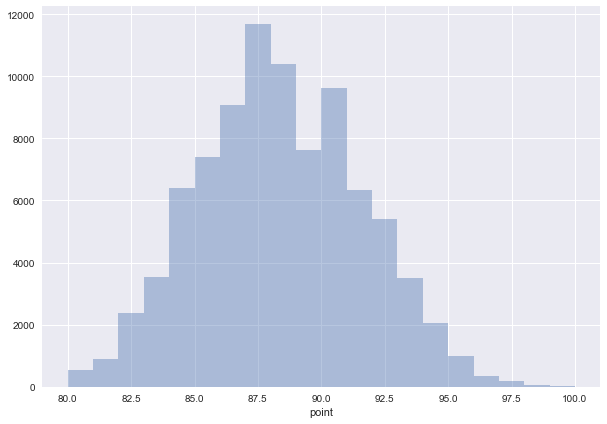

In [63]:
wine = pd.read_csv('wine_stem.csv')
wine.drop(['Unnamed: 0', 'region2'], axis = 1, inplace = True)

duplicated_records = wine[wine.duplicated(['countri', 'descript', 'design', 'point', 'price', 'provinc', 'region1', 'varieti', 'wineri'])]
duplicated_records.shape
new_wine = wine.drop_duplicates()
new_wine.shape

new_wine = new_wine.dropna(subset=['price','countri', 'provinc'])
new_wine.shape
#points distribution of new wine
fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.distplot(new_wine['point'], bins = 20, kde=False)
#- The majority of the wines are rated between 86 and 90 points. 
# - The mean value of the points is about 88
# - There are 11 wines that have been rated 100 points and 28 wines that have been rated 99

In [133]:
wines100 = new_wine[new_wine['points'] == 100]
wines100['country'].value_counts()

US           5
Italy        3
France       2
Australia    1
Name: country, dtype: int64

In [134]:
wines100.groupby('country')['price'].mean()
# - US seems to have more value for money wines with highly rated wines but not so high prices
# - France has few highly rated wines but with high prices
# - Italy and Australia are somewhere in the middle

country
Australia     300.000000
France       1124.000000
Italy         288.333333
US            165.000000
Name: price, dtype: float64

In [135]:
price_by_country_and_province = new_wine.groupby(['country', 'province'])['price'].median()
df_price = pd.DataFrame(price_by_country_and_province)
df_price.reset_index(inplace = True)
df_price.head()

,country,province,price
0,Albania,Mirdit��,20.0
1,Argentina,Mendoza Province,15.0
2,Argentina,Other,14.0
3,Australia,Australia Other,10.0
4,Australia,New South Wales,17.0


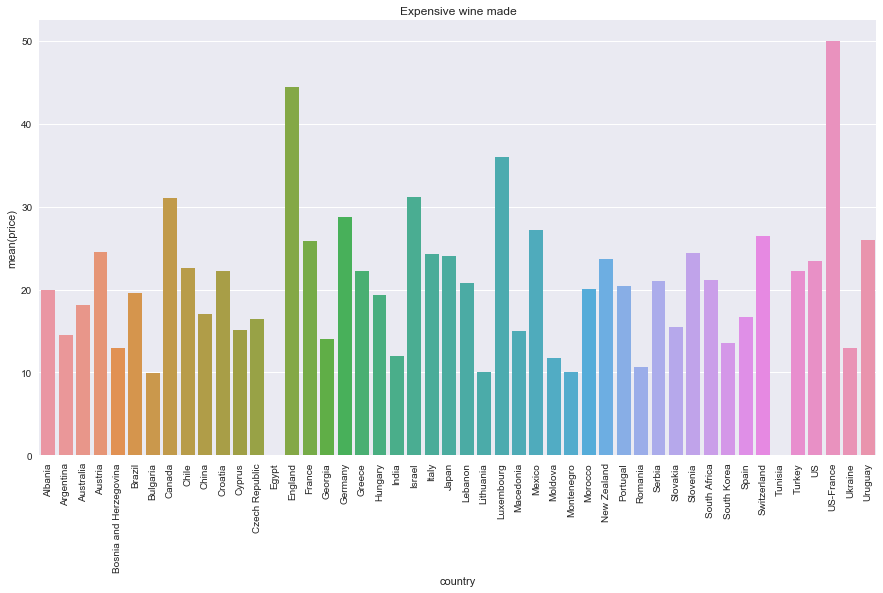

In [137]:
mean_price_in_country = df_price.groupby(['country'])['price'].mean()
df_mean_price = pd.DataFrame(mean_price_in_country)
df_mean_price.reset_index(inplace = True)

fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = 'country', y = 'price', data = df_mean_price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Expensive wine made');

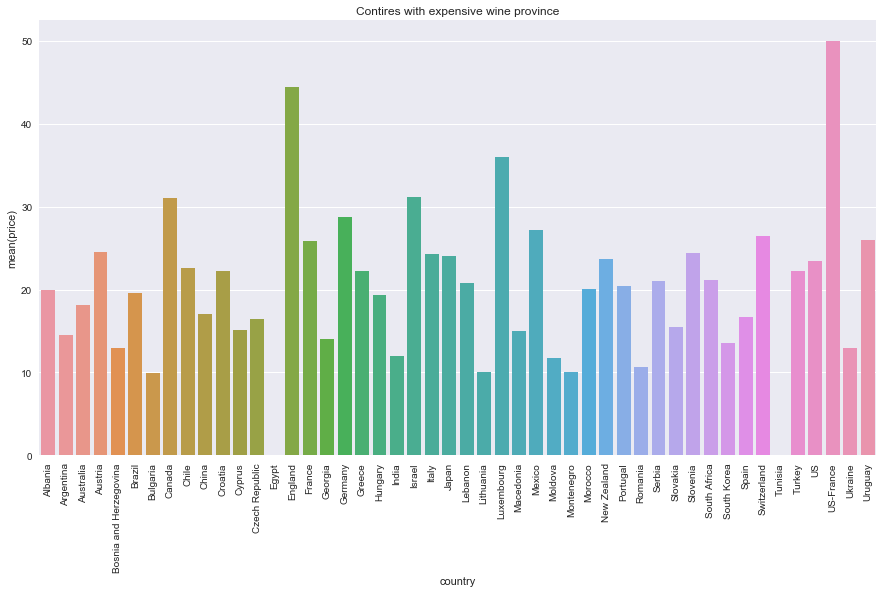

In [138]:
max_price_in_country = df_price.groupby(['country'])['price'].max()
df_max_price = pd.DataFrame(mean_price_in_country)
df_max_price.reset_index(inplace = True)

fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = 'country', y = 'price', data = df_max_price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Contires with expensive wine province');
# - From the first chart, I was looking for the country which, generally, has expensive wines. It seems that 
# US-France ranks the highest, followed by England and then Luxembourg.
# - On the second chart, I was looking for which country has a province that produces high priced wines. As a result, these countries are: Chile, Portugal, Germany (didn't expect that) and US.

In [105]:
points_by_country_and_province = new_wine.groupby(['countri', 'provinc'])['point'].mean()
split_points_test = pd.DataFrame(points_by_country_and_province)
split_points_test.reset_index(inplace = True)
split_points_test.head()

,countri,provinc,point
0,albania,mirdit,88.000000
1,argentina,mendoza provinc,86.183841
2,australia,australia,84.940510
3,australia,new south wale,86.986755
4,australia,queensland,85.000000


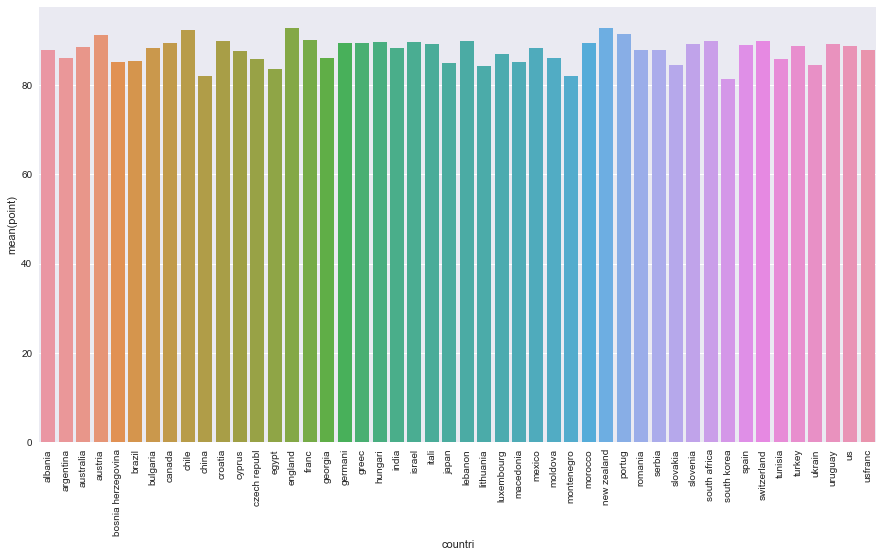

In [106]:
t = split_points_test.groupby(['countri'])['point'].max()
x = pd.DataFrame(t)
x.reset_index(inplace = True)

fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = 'countri', y = 'point', data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# -Although a bit hard to read, it seems that New Zealand, England, Chile and Portugal receive high points for their wines.

In [394]:
wine = pd.read_csv('wine_stem.csv')
wine.drop(['Unnamed: 0', 'region2'], axis = 1, inplace = True)

duplicated_records = wine[wine.duplicated(['countri', 'descript', 'design', 'point', 'price', 'provinc', 'region1', 'varieti', 'wineri'])]
duplicated_records.shape
new_wine = wine.drop_duplicates()
new_wine.shape

new_wine = new_wine.dropna(subset=['price','countri', 'provinc'])
new_wine.shape

wine_df=new_wine.loc[new_wine.countri=='us',['descript','provinc','design','point','price','region1','varieti','wineri']]

In [490]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split

wine_df=new_wine.loc[new_wine.countri=='us',['descript','provinc','design','point','price','region1','varieti','wineri']]

wine_train = wine_df

design_lab=LabelEncoder().fit(np.unique(new_wine.design.values))
prov_lab=LabelEncoder().fit(np.unique(new_wine.provinc.values))
regn_lab=LabelEncoder().fit(np.unique(new_wine.region1.values))
var_lab=LabelEncoder().fit(np.unique(new_wine.varieti.values))
wnry_lab=LabelEncoder().fit(np.unique(new_wine.wineri.values))
points_lab=LabelEncoder().fit(np.unique(new_wine.point.values))
wine_train['prov_enc']=prov_lab.transform(wine_train.provinc)
wine_train['design_enc']=design_lab.transform(wine_train.design)
wine_train['regn_enc']=regn_lab.transform(wine_train.region1)
wine_train['var_enc']=var_lab.transform(wine_train.varieti)
wine_train['wnry_enc']=wnry_lab.transform(wine_train.wineri)
wine_train['points_enc']=points_lab.transform(wine_train.point)
wine_train=wine_train.drop(['provinc','design','point','region1','varieti','wineri'],axis=1)

bin_map={
    2300:'extreme expensive',
    2013:'extreme expensive',
    1900:'extreme expensive',
    1400:'extreme expensive',
    1400:'extreme expensive',
    1400:'extreme expensive',
    1300:'extreme expensive',
    1200:'extreme expensive',
    1100:'extreme expensive',
    1100:'extreme expensive',
    1000:'extreme expensive',
    980:'very expensive',
900:'very expensive',
850:'very expensive',
850:'very expensive',
850:'very expensive',
848:'very expensive',
800:'very expensive',
800:'very expensive',
800:'very expensive',
800:'very expensive',
775:'very expensive',
775:'very expensive',
770:'very expensive',
770:'very expensive',
764:'very expensive',
757:'very expensive',
757:'very expensive',
757:'very expensive',
740:'very expensive',
698:'very expensive',
685:'very expensive',
670:'very expensive',
670:'very expensive',
660:'very expensive',
660:'very expensive',
660:'very expensive',
660:'very expensive',
639:'very expensive',
639:'very expensive',
625:'very expensive',
625:'very expensive',
625:'very expensive',
625:'very expensive',
612:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
599:'very expensive',
596:'very expensive',
596:'very expensive',
588:'very expensive',
580:'very expensive',
574:'very expensive',
550:'very expensive',
550:'very expensive',
550:'very expensive',
550:'very expensive',
545:'very expensive',
544:'very expensive',
535:'very expensive',
535:'very expensive',
535:'very expensive',
530:'very expensive',
525:'very expensive',
520:'very expensive',
510:'very expensive',
505:'very expensive',
505:'very expensive',
505:'very expensive',
100:'expensive',
101:'expensive',
102:'expensive',
103:'expensive',
104:'expensive',
105:'expensive',
106:'expensive',
107:'expensive',
108:'expensive',
109:'expensive',
110:'expensive',
111:'expensive',
112:'expensive',
113:'expensive',
114:'expensive',
115:'expensive',
116:'expensive',
117:'expensive',
118:'expensive',
119:'expensive',
120:'expensive',
121:'expensive',
122:'expensive',
123:'expensive',
124:'expensive',
125:'expensive',
126:'expensive',
127:'expensive',
128:'expensive',
129:'expensive',
130:'expensive',
131:'expensive',
132:'expensive',
133:'expensive',
134:'expensive',
135:'expensive',
136:'expensive',
137:'expensive',
138:'expensive',
139:'expensive',
140:'expensive',
141:'expensive',
142:'expensive',
143:'expensive',
144:'expensive',
145:'expensive',
146:'expensive',
147:'expensive',
148:'expensive',
149:'expensive',
150:'expensive',
151:'expensive',
152:'expensive',
153:'expensive',
154:'expensive',
155:'expensive',
156:'expensive',
157:'expensive',
158:'expensive',
159:'expensive',
160:'expensive',
161:'expensive',
162:'expensive',
163:'expensive',
164:'expensive',
165:'expensive',
166:'expensive',
167:'expensive',
168:'expensive',
169:'expensive',
170:'expensive',
171:'expensive',
172:'expensive',
173:'expensive',
174:'expensive',
175:'expensive',
176:'expensive',
177:'expensive',
178:'expensive',
179:'expensive',
180:'expensive',
181:'expensive',
182:'expensive',
183:'expensive',
184:'expensive',
185:'expensive',
186:'expensive',
187:'expensive',
188:'expensive',
189:'expensive',
190:'expensive',
191:'expensive',
192:'expensive',
193:'expensive',
194:'expensive',
195:'expensive',
196:'expensive',
197:'expensive',
198:'expensive',
199:'expensive',
200:'expensive',
201:'expensive',
202:'expensive',
203:'expensive',
204:'expensive',
205:'expensive',
206:'expensive',
207:'expensive',
208:'expensive',
209:'expensive',
210:'expensive',
211:'expensive',
212:'expensive',
213:'expensive',
214:'expensive',
215:'expensive',
216:'expensive',
217:'expensive',
218:'expensive',
219:'expensive',
220:'expensive',
221:'expensive',
222:'expensive',
223:'expensive',
224:'expensive',
225:'expensive',
226:'expensive',
227:'expensive',
228:'expensive',
229:'expensive',
230:'expensive',
231:'expensive',
232:'expensive',
233:'expensive',
234:'expensive',
235:'expensive',
236:'expensive',
237:'expensive',
238:'expensive',
239:'expensive',
240:'expensive',
241:'expensive',
242:'expensive',
243:'expensive',
244:'expensive',
245:'expensive',
246:'expensive',
247:'expensive',
248:'expensive',
249:'expensive',
250:'expensive',
251:'expensive',
252:'expensive',
253:'expensive',
254:'expensive',
255:'expensive',
256:'expensive',
257:'expensive',
258:'expensive',
259:'expensive',
260:'expensive',
261:'expensive',
262:'expensive',
263:'expensive',
264:'expensive',
265:'expensive',
266:'expensive',
267:'expensive',
268:'expensive',
269:'expensive',
270:'expensive',
271:'expensive',
272:'expensive',
273:'expensive',
274:'expensive',
275:'expensive',
276:'expensive',
277:'expensive',
278:'expensive',
279:'expensive',
280:'expensive',
281:'expensive',
282:'expensive',
283:'expensive',
284:'expensive',
285:'expensive',
286:'expensive',
287:'expensive',
288:'expensive',
289:'expensive',
290:'expensive',
291:'expensive',
292:'expensive',
293:'expensive',
294:'expensive',
295:'expensive',
296:'expensive',
297:'expensive',
298:'expensive',
299:'expensive',
300:'expensive',
301:'expensive',
302:'expensive',
303:'expensive',
304:'expensive',
305:'expensive',
306:'expensive',
307:'expensive',
308:'expensive',
309:'expensive',
310:'expensive',
311:'expensive',
312:'expensive',
313:'expensive',
314:'expensive',
315:'expensive',
316:'expensive',
317:'expensive',
318:'expensive',
319:'expensive',
320:'expensive',
321:'expensive',
322:'expensive',
323:'expensive',
324:'expensive',
325:'expensive',
326:'expensive',
327:'expensive',
328:'expensive',
329:'expensive',
330:'expensive',
331:'expensive',
332:'expensive',
333:'expensive',
334:'expensive',
335:'expensive',
336:'expensive',
337:'expensive',
338:'expensive',
339:'expensive',
340:'expensive',
341:'expensive',
342:'expensive',
343:'expensive',
344:'expensive',
345:'expensive',
346:'expensive',
347:'expensive',
348:'expensive',
349:'expensive',
350:'expensive',
351:'expensive',
352:'expensive',
353:'expensive',
354:'expensive',
355:'expensive',
356:'expensive',
357:'expensive',
358:'expensive',
359:'expensive',
360:'expensive',
361:'expensive',
362:'expensive',
363:'expensive',
364:'expensive',
365:'expensive',
366:'expensive',
367:'expensive',
368:'expensive',
369:'expensive',
370:'expensive',
371:'expensive',
372:'expensive',
373:'expensive',
374:'expensive',
375:'expensive',
376:'expensive',
377:'expensive',
378:'expensive',
379:'expensive',
380:'expensive',
381:'expensive',
382:'expensive',
383:'expensive',
384:'expensive',
385:'expensive',
386:'expensive',
387:'expensive',
388:'expensive',
389:'expensive',
390:'expensive',
391:'expensive',
392:'expensive',
393:'expensive',
394:'expensive',
395:'expensive',
396:'expensive',
397:'expensive',
398:'expensive',
399:'expensive',
400:'expensive',
401:'expensive',
402:'expensive',
403:'expensive',
404:'expensive',
405:'expensive',
406:'expensive',
407:'expensive',
408:'expensive',
409:'expensive',
410:'expensive',
411:'expensive',
412:'expensive',
413:'expensive',
414:'expensive',
415:'expensive',
416:'expensive',
417:'expensive',
418:'expensive',
419:'expensive',
420:'expensive',
421:'expensive',
422:'expensive',
423:'expensive',
424:'expensive',
425:'expensive',
426:'expensive',
427:'expensive',
428:'expensive',
429:'expensive',
430:'expensive',
431:'expensive',
432:'expensive',
433:'expensive',
434:'expensive',
435:'expensive',
436:'expensive',
437:'expensive',
438:'expensive',
439:'expensive',
440:'expensive',
441:'expensive',
442:'expensive',
443:'expensive',
444:'expensive',
445:'expensive',
446:'expensive',
447:'expensive',
448:'expensive',
449:'expensive',
450:'expensive',
451:'expensive',
452:'expensive',
453:'expensive',
454:'expensive',
455:'expensive',
456:'expensive',
457:'expensive',
458:'expensive',
459:'expensive',
460:'expensive',
461:'expensive',
462:'expensive',
463:'expensive',
464:'expensive',
465:'expensive',
466:'expensive',
467:'expensive',
468:'expensive',
469:'expensive',
470:'expensive',
471:'expensive',
472:'expensive',
473:'expensive',
474:'expensive',
475:'expensive',
476:'expensive',
477:'expensive',
478:'expensive',
479:'expensive',
480:'expensive',
481:'expensive',
482:'expensive',
483:'expensive',
484:'expensive',
485:'expensive',
486:'expensive',
487:'expensive',
488:'expensive',
489:'expensive',
490:'expensive',
491:'expensive',
492:'expensive',
493:'expensive',
494:'expensive',
495:'expensive',
496:'expensive',
497:'expensive',
498:'expensive',
499:'expensive',
    500:'expensive',
    50:'normal',
51:'normal',
52:'normal',
53:'normal',
54:'normal',
55:'normal',
56:'normal',
57:'normal',
58:'normal',
59:'normal',
60:'normal',
61:'normal',
62:'normal',
63:'normal',
64:'normal',
65:'normal',
66:'normal',
67:'normal',
68:'normal',
69:'normal',
70:'normal',
71:'normal',
72:'normal',
73:'normal',
74:'normal',
75:'normal',
76:'normal',
77:'normal',
78:'normal',
79:'normal',
80:'normal',
81:'normal',
82:'normal',
83:'normal',
84:'normal',
85:'normal',
86:'normal',
87:'normal',
88:'normal',
89:'normal',
90:'normal',
91:'normal',
92:'normal',
93:'normal',
94:'normal',
95:'normal',
96:'normal',
97:'normal',
98:'normal',
99:'normal',
100:'normal',
    1:'cheap',
2:'cheap',
3:'cheap',
4:'cheap',
5:'cheap',
6:'cheap',
7:'cheap',
8:'cheap',
9:'cheap',
10:'cheap',
11:'cheap',
12:'cheap',
13:'cheap',
14:'cheap',
15:'cheap',
16:'cheap',
17:'cheap',
18:'cheap',
19:'cheap',
20:'cheap',
21:'cheap',
22:'cheap',
23:'cheap',
24:'cheap',
25:'cheap',
26:'cheap',
27:'cheap',
28:'cheap',
29:'cheap',
30:'cheap',
31:'cheap',
32:'cheap',
33:'cheap',
34:'cheap',
35:'cheap',
36:'cheap',
37:'cheap',
38:'cheap',
39:'cheap',
40:'cheap',
41:'cheap',
42:'cheap',
43:'cheap',
44:'cheap',
45:'cheap',
46:'cheap',
47:'cheap',
48:'cheap',
49:'cheap'
    
    
}
wine_train['price_bins']=wine_train.price.map(bin_map)
wine_train.price_bins.unique() # Ensure no records are un-binned
wine_train=wine_train.drop('price',axis=1)
price_lab=LabelEncoder().fit(np.unique(wine_train.price_bins.values))
wine_train['price_enc']=price_lab.transform(wine_train.price_bins)
wine_train=wine_train.drop(['price_bins'],axis=1)

In [491]:
wine_train

,descript,prov_enc,design_enc,regn_enc,var_enc,wnry_enc,points_enc,price_enc
0,tremend 100 variet wine hail oakvill age three...,51,15621,700,69,6621,16,1
2,mac watson honor memori wine made mother treme...,51,23130,498,456,8252,16,3
3,spent 20 month 30 new french oak incorpor frui...,279,20190,1167,392,10154,16,3
8,renam vineyard former bottl delancellotti youl...,279,22566,190,392,988,15,3
9,produc sourc two block vineyard wineon high el...,51,9974,950,392,1136,15,3
11,18yearold vine suppl wellbalanc effort blend f...,279,8829,826,392,9719,15,0
12,standout even terrif lineup 2015 releas patric...,279,26539,375,392,9719,15,0
14,sophist mix miner acid tart fruit seduct effor...,279,10393,375,392,4936,15,1
15,first made 2006 succul luscious chardonnay min...,279,22554,1167,109,988,15,3
16,blockbust powerhous wine suggest blueberri pie...,51,19779,361,69,6491,15,1


In [395]:
new_wine

,countri,descript,design,point,price,provinc,region1,varieti,wineri
0,us,tremend 100 variet wine hail oakvill age three...,martha vineyard,96,235.0,california,napa valley,cabernet sauvignon,heitz
1,spain,ripe aroma fig blackberri cassi soften sweeten...,carodorum seleccin especi reserva,96,110.0,northern spain,toro,tinta de toro,bodega carmen rodrguez
2,us,mac watson honor memori wine made mother treme...,special select late harvest,96,90.0,california,knight valley,sauvignon blanc,macauley
3,us,spent 20 month 30 new french oak incorpor frui...,reserv,96,65.0,oregon,willamett valley,pinot noir,ponzi
4,franc,top wine la bgude name highest point vineyard ...,la brlade,95,66.0,provenc,bandol,provenc red blend,domain de la bgude
5,spain,deep dens pure open bell toro winner aroma dar...,numanthia,95,73.0,northern spain,toro,tinta de toro,numanthia
6,spain,slight gritti blackfruit aroma includ sweet no...,san romn,95,65.0,northern spain,toro,tinta de toro,maurodo
7,spain,lush cedari blackfruit aroma lux offer note ma...,carodorum nico crianza,95,110.0,northern spain,toro,tinta de toro,bodega carmen rodrguez
8,us,renam vineyard former bottl delancellotti youl...,silic,95,65.0,oregon,chehalem mountain,pinot noir,bergstrm
9,us,produc sourc two block vineyard wineon high el...,gap crown vineyard,95,60.0,california,sonoma coast,pinot noir,blue farm


In [396]:
wine_df

,descript,provinc,design,point,price,region1,varieti,wineri
0,tremend 100 variet wine hail oakvill age three...,california,martha vineyard,96,235.0,napa valley,cabernet sauvignon,heitz
2,mac watson honor memori wine made mother treme...,california,special select late harvest,96,90.0,knight valley,sauvignon blanc,macauley
3,spent 20 month 30 new french oak incorpor frui...,oregon,reserv,96,65.0,willamett valley,pinot noir,ponzi
8,renam vineyard former bottl delancellotti youl...,oregon,silic,95,65.0,chehalem mountain,pinot noir,bergstrm
9,produc sourc two block vineyard wineon high el...,california,gap crown vineyard,95,60.0,sonoma coast,pinot noir,blue farm
11,18yearold vine suppl wellbalanc effort blend f...,oregon,estat vineyard wadensvil block,95,48.0,ribbon ridg,pinot noir,patricia green cellar
12,standout even terrif lineup 2015 releas patric...,oregon,weber vineyard,95,48.0,dunde hill,pinot noir,patricia green cellar
14,sophist mix miner acid tart fruit seduct effor...,oregon,grace vineyard,95,185.0,dunde hill,pinot noir,domain seren
15,first made 2006 succul luscious chardonnay min...,oregon,sigrid,95,90.0,willamett valley,chardonnay,bergstrm
16,blockbust powerhous wine suggest blueberri pie...,california,rainin vineyard,95,325.0,diamond mountain district,cabernet sauvignon,hall


In [492]:
def normalize(text):
    letters = re.sub("[^a-zA-Z]", " ", text)
    words = letters.lower()
    return words

In [406]:
processed_descriptions = []
for description in wine_train['descript']:
    norm = normalize(description)
    processed_descriptions.append(norm)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=3)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_descriptions)
feature_names = tfidf_vectorizer.get_feature_names()
doc = 10
feature_index = tfidf_matrix[:,:].nonzero()[1]
tfidf_scores = zip(feature_index, sorted([tfidf_matrix[doc, x] for x in feature_index]))


In [407]:
# function were taken from here: https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=20):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return top_feats

def top_feats_in_doc(Xtr, features, row_id, top_n=20):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


In [408]:
import time
start_time = time.time()

# limit dataset to the more popular wine varieties
# df_variety = new_wine.groupby('varieti').filter(lambda x: len(x) > 5000)

word_scores = []
for i, j in enumerate(wine_train['price_enc']):
    for item in top_feats_in_doc(tfidf_matrix, feature_names, i):
        word_scores.append(item + (j,))

df = pd.DataFrame(word_scores)
df.columns = ['feature', 'tfidf', 'price_enc']
df = df.sort_values('tfidf', ascending=False).groupby('price_enc').head(15)
elapsed_time = time.time() - start_time
print elapsed_time

69.3862190247


In [493]:
from sklearn.model_selection import KFold
start_time = time.time()
X,y = df[['feature','tfidf']], df['price_enc']
from sklearn.tree import DecisionTreeClassifier
crossvalidation = KFold(n=X.shape[0], n_folds=5,shuffle=True, random_state=1)
for depth in range(1,10):
    tree_classifier = DecisionTreeClassifier(
        max_depth=3, random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, X, y,scoring="accuracy", cv=crossvalidation, n_jobs=1))
    print "Depth: %i Accuracy: %.3f" % (depth,score)
tree.export_graphviz(tree_classifier, out_file='decisiontree.dot')
print time.time() - start_time

TypeError: __init__() got an unexpected keyword argument 'n_folds'

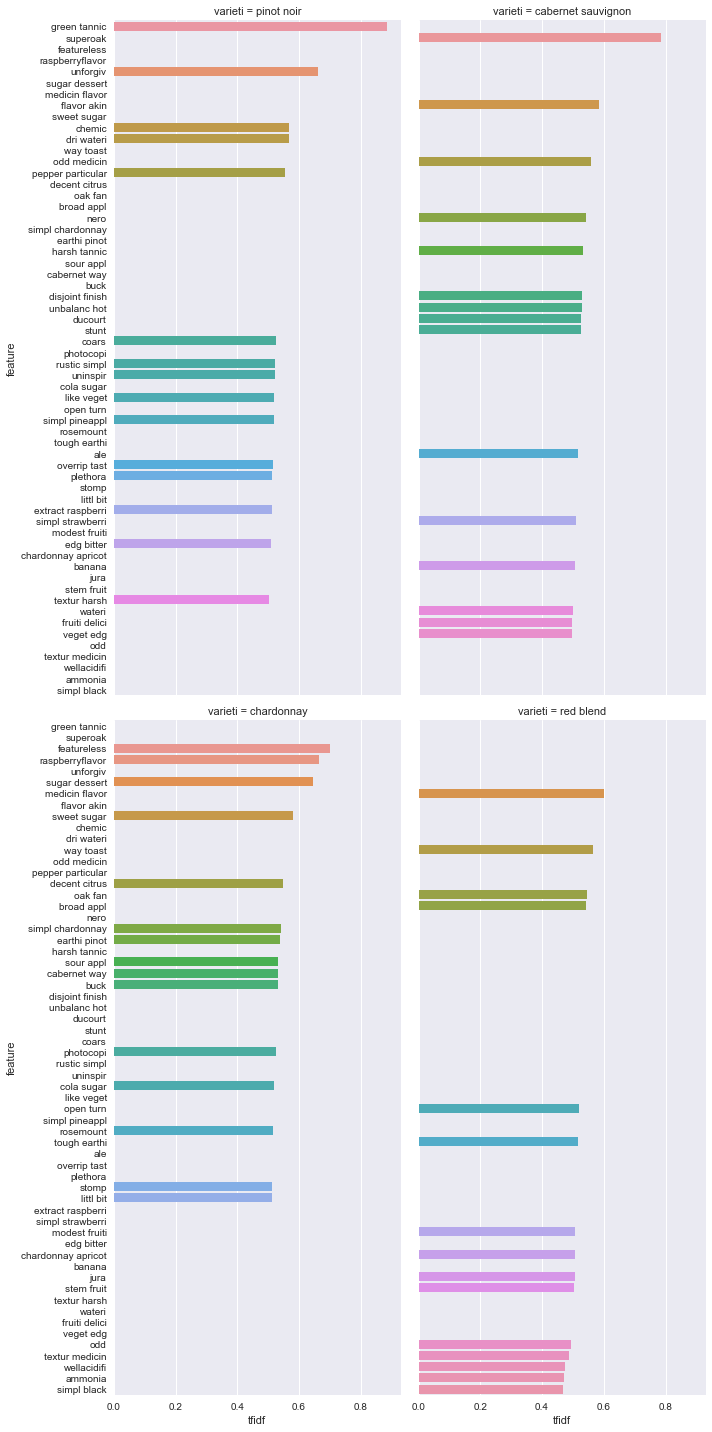

In [332]:
sns.factorplot(x = 'tfidf', y = 'feature', col='varieti', col_wrap=2, data = df, kind='bar', size=10, aspect=.5).savefig("important characteristics of a wines_test")

237.764680862


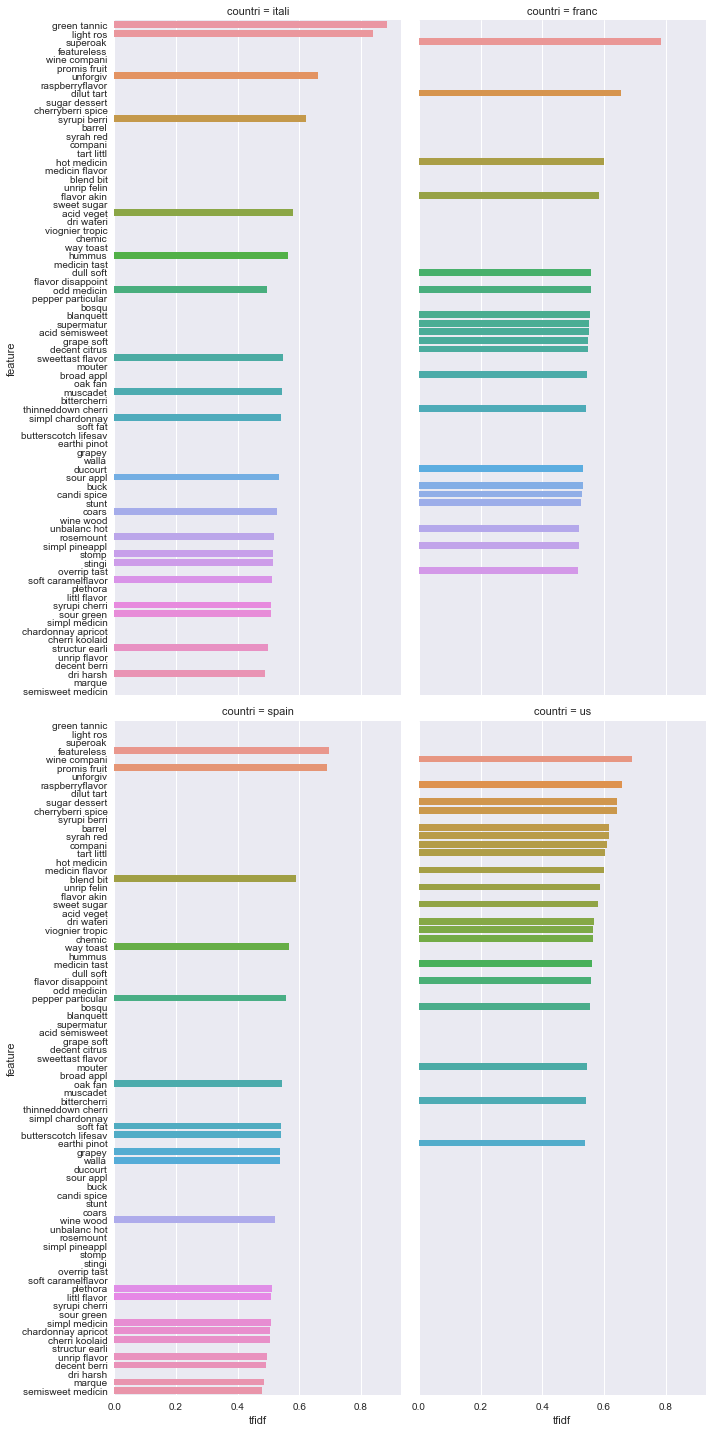

In [164]:
import time
start_time = time.time()
df_country = new_wine.groupby('countri').filter(lambda x: len(x) > 4000)

word_scores_by_country = []
for i, j in enumerate(df_country['countri']):
    for item in top_feats_in_doc(tfidf_matrix, feature_names, i):
        word_scores_by_country.append(item + (j,))

df = pd.DataFrame(word_scores_by_country)
df.columns = ['feature', 'tfidf', 'countri']
df = df.sort_values('tfidf', ascending=False).groupby('countri').head(20)

sns.factorplot(x = 'tfidf', y = 'feature', col='countri', col_wrap=2, data = df, kind='bar', size=10, aspect=.5).savefig("important characteristics of a wine by country_stem")
print time.time() - start_time

In [165]:
df

,feature,tfidf,countri
658640,green tannic,0.885703,itali
1227620,light ros,0.839382,itali
322900,superoak,0.785809,franc
319680,featureless,0.696230,spain
1259320,wine compani,0.692300,us
1405800,promis fruit,0.688446,spain
592980,unforgiv,0.660422,itali
506760,raspberryflavor,0.658090,us
1295520,dilut tart,0.656716,franc
637780,sugar dessert,0.643801,us


In [54]:
data = pd.read_csv('wine_stem.csv', encoding='utf-8')

In [56]:
labels = data['varieti']
descriptions = data['descript']

In [57]:
print('{}   :   {}'.format(labels.tolist()[0], descriptions.tolist()[0]))
print('{}   :   {}'.format(labels.tolist()[56], descriptions.tolist()[56]))
print('{}   :   {}'.format(labels.tolist()[93], descriptions.tolist()[93]))
# Even if you're not someone who knows wine, I think that there is a pretty clear distinction in the descriptions of these different types of wines. The Cabernet Sauvignon (a red wine) was described with words like cherry, tannin and carmel. The next two reviews are white wines, but even they show differences in their description. The sauvignon blanc is described as minerally, citrus, and green fruits while the chardonnay is described as smokey, earthy, crisp-apple, and buttery. This provides us with good motivation to move forward and explore the data more.

# One of the limitations that I think we will have with this dataset is that there will be a lot more reviews for popular wine varietals than less popular wine varietals. This isn't bad neccissarily, but it means that we will probably only be able to classify the most popular N varietals.

cabernet sauvignon   :   tremend 100 variet wine hail oakvill age three year oak juici redcherri fruit compel hint caramel greet palat frame eleg fine tannin subtl minti tone background balanc reward start finish year ahead develop nuanc enjoy 20222030
sauvignon blanc   :   delici also young textur wine come biodynam grown grape strong sens miner well intens citrus green fruit tight moment need round drink 2018
chardonnay   :   smoki scent earthi crispappl flavor make mediumbodi wine chang pace averag butterbal chardonnay welcom acid nice smooth textur


In [58]:
varietal_counts = labels.value_counts()
print(varietal_counts[:50])
# If you drink wine regularly you will probably recognize the most reviewed wines listed above. The value counts for different wine varietals does verify my theory that less popular wines might not have enough reviews to classify them. The most popular wine varietals have thousands of reviews, but even towards the bottom end of the top 50 wine varietals there are only a few hundred reviews. This isn't a problem for building a word2vec model like we are going to do next, but it is something to keep in mind as we move forward trying to create a wine classifier.

chardonnay                     14482
pinot noir                     14291
cabernet sauvignon             12800
red blend                      10062
bordeauxstyl red blend          7347
sauvignon blanc                 6320
syrah                           5825
riesl                           5524
merlot                          5070
zinfandel                       3799
sangioves                       3345
malbec                          3208
white blend                     2824
ros                             2817
tempranillo                     2556
nebbiolo                        2241
portugues red                   2216
sparkl blend                    2004
shiraz                          1970
corvina rondinella molinara     1682
rhnestyl red blend              1505
pinot gris                      1365
barbera                         1365
cabernet franc                  1363
sangioves grosso                1346
pinot grigio                    1305
viognier                        1263
b

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

dataset = pd.read_csv('winemag-data_first150k.csv',low_memory = False, encoding='ISO-8859-1')
df = dataset

In [84]:
X = df.iloc[:, [10,4]].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])

In [85]:
import numpy as np


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [86]:
X

array([[-0.08811689,  2.51726326],
       [-1.50562098,  2.51726326],
       [ 0.32056246,  2.51726326],
       ..., 
       [ 1.29240476,  0.96561563],
       [-0.17050815,  0.6552861 ],
       [-1.71908924,  0.6552861 ]])

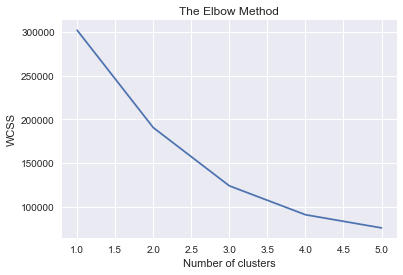

In [87]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

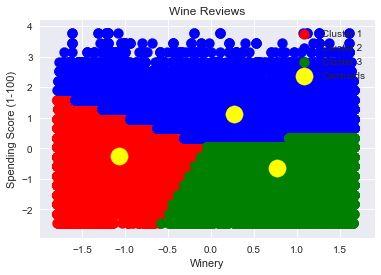

In [88]:
kmeans = KMeans(n_clusters =3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Wine Reviews')
plt.xlabel('Winery')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()